# Vamos importar o ficheiro e aplicar KNN, Regressao Logistica com Cross-Validation

In [1]:
# faça o upload do ficheiro csv associado à atividade

# vamos importar a biblioteca
import pandas as pd
import numpy as np
# vamos importar o dataframe do ficheiro .csv
df_contract_renewal = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/South_China.csv")

# Exploracao inicial

In [2]:
# exploração inicial
df_contract_renewal.head()

,ID,Registration_Duration,Revenue,Cost,Renewal
0,10001,29,46,8.33316,True
1,10002,58,105,18.24564,True
2,10003,36,55,3.13296,True
3,10004,32,28,9.96705,True
4,10005,26,32,7.19040,False


In [3]:
df_contract_renewal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1500 non-null   int64  
 1   Registration_Duration  1500 non-null   int64  
 2   Revenue                1500 non-null   int64  
 3   Cost                   1500 non-null   float64
 4   Renewal                1500 non-null   bool   
dtypes: bool(1), float64(1), int64(3)
memory usage: 48.5 KB


In [4]:
df_contract_renewal.shape

(1500, 5)

In [5]:
df_contract_renewal.describe()

,ID,Registration_Duration,Revenue,Cost
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,10750.500000,33.756000,58.387333,6.191050
std,433.157015,10.928133,61.862056,8.206847
min,10001.000000,19.000000,13.000000,0.513600
25%,10375.750000,25.000000,28.000000,1.821140
50%,10750.500000,33.000000,40.000000,3.735905
75%,11125.250000,40.000000,64.000000,7.245237
max,11500.000000,72.000000,981.000000,96.471200


In [6]:
# Get the counts of each unique value in the 'Renewal' column
renewal_counts = df_contract_renewal['Renewal'].value_counts()

# Print the counts
print("Counts of each unique value in the 'Renewal' column:")
print(renewal_counts)

Counts of each unique value in the 'Renewal' column:
Renewal
True     952
False    548
Name: count, dtype: int64


# Vamos dividir em treino e test com ajuda do scikit-learn

In [7]:
# definimos a variável alvo
target_variable = "Renewal"

# train_test split usando a função train_test_split
X = df_contract_renewal.drop(["ID", target_variable], axis = 1)
y = df_contract_renewal[target_variable]
y.sum()/len(y)

# Check unique class labels
print("Class labels:", y.unique())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12,
                                                    stratify = y)

Class labels: [ True False]


# Vamos aplicar o modelo KNN

In [8]:
# importamos o modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
knn.score(X_test, y_test)

0.6755555555555556

# Vamos aplicar o modelo de regressão logística

In [9]:
# importamos o modelo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( max_iter = 250)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
log_reg.score(X_test, y_test)

0.7177777777777777

## &nbsp;Vamos aplicar o Cross-Validation

In [10]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

# Cross Validation with KNN

In [11]:
# importamos o modelo
from sklearn.model_selection import cross_validate
# importamos os modelos de CV e as métricas
from sklearn.model_selection import (KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit, RepeatedKFold)

scoring = ['precision', 'recall', 'neg_log_loss', 'accuracy']
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_knn = cross_validate(knn, X_train, y_train, cv=kfold, scoring=scoring)

# vemos os resultados
print("Accuracy scores for KNN:", np.mean(cv_results_knn['test_accuracy']).round(2))
print("Precision scores for KNN:", np.mean(cv_results_knn['test_precision']).round(2))
print("Recall scores for KNN:", np.mean(cv_results_knn['test_recall']).round(2))

Accuracy scores for KNN: 0.69
Precision scores for KNN: 0.72
Recall scores for KNN: 0.83


In [12]:
cv_results_knn

{'fit_time': array([0.00198698, 0.        , 0.00101042, 0.01299214, 0.00133944]),
 'score_time': array([0.02002358, 0.02328444, 0.00543952, 0.01668644, 0.01719999]),
 'test_precision': array([0.75816993, 0.75182482, 0.6875    , 0.7114094 , 0.71428571]),
 'test_recall': array([0.86567164, 0.77443609, 0.82706767, 0.79699248, 0.86466165]),
 'test_neg_log_loss': array([-1.00957108, -1.2201491 , -1.40169702, -1.40897114, -1.23581787]),
 'test_accuracy': array([0.73809524, 0.6952381 , 0.65238095, 0.66666667, 0.6952381 ])}

# Cross Validation with Logist Regression

In [13]:
scoring = ['precision', 'recall', 'neg_log_loss', 'accuracy']
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_log_reg = cross_validate(log_reg, X_train, y_train, cv=kfold, scoring=scoring)

print("Accuracy scores for Logistic Regression:", np.mean(cv_results_knn['test_accuracy']).round(2))
print("Precision scores for Logistic Regression:", np.mean(cv_results_log_reg['test_precision']).round(2))
print("Recall scores for Logistic Regression:", np.mean(cv_results_log_reg['test_recall']).round(2))
print("Log loss for Logistic Regression:", - np.mean(cv_results_log_reg['test_neg_log_loss']).round(2))

Accuracy scores for Logistic Regression: 0.69
Precision scores for Logistic Regression: 0.77
Recall scores for Logistic Regression: 0.83
Log loss for Logistic Regression: 0.54


# Matrix de confusao e classification report

In [14]:
# importamos os módulos que precisamos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# vamos ver as métricas para o KNN
rótulos = [ 'nao renova','renova']
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names = rótulos))
# vamos ver as métricas para a regressão logística
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg, target_names = rótulos))

[[ 78  86]
 [ 60 226]]
              precision    recall  f1-score   support

  nao renova       0.57      0.48      0.52       164
      renova       0.72      0.79      0.76       286

    accuracy                           0.68       450
   macro avg       0.64      0.63      0.64       450
weighted avg       0.67      0.68      0.67       450

[[ 93  71]
 [ 56 230]]
              precision    recall  f1-score   support

  nao renova       0.62      0.57      0.59       164
      renova       0.76      0.80      0.78       286

    accuracy                           0.72       450
   macro avg       0.69      0.69      0.69       450
weighted avg       0.71      0.72      0.71       450



In [15]:
# para verificar a accuracy do modelo aplicamos a função .score
knn.score(X_test, y_test)

0.6755555555555556

In [16]:
# para verificar a accuracy do modelo aplicamos a função .score
log_reg.score(X_test, y_test)

0.7177777777777777

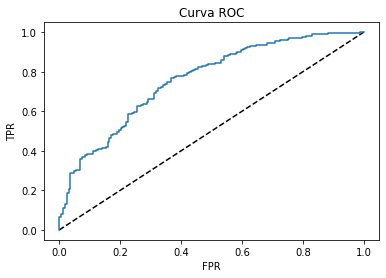

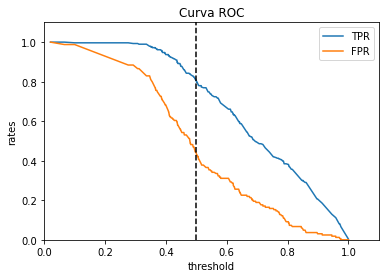

In [17]:
# importamos a curva roc
from sklearn.metrics import roc_curve

# Calculamos as probabilidades previstas (.predict_proba)
log_reg.predict_proba(X_test)
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:,1] # escolhemos a segunda coluna

# Vamos gerar a curva ROC
FPR, TPR, thresholds = roc_curve(y_test, y_pred_log_reg_prob)

# Vamos visualizar a curva
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

# vamos visualisar a influência do threshold
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.plot(thresholds[1:], TPR[1:])
plt.plot(thresholds[1:], FPR[1:])
plt.plot([0.5, 0.5], [0, 1.1], 'k--')
plt.xlabel('threshold')
plt.ylabel('rates')
plt.legend(['TPR', 'FPR'])
plt.title('Curva ROC')
plt.show()

In [18]:
log_reg.predict(X_test)

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,

In [19]:
log_reg.predict_proba(X_test)

array([[4.87433264e-01, 5.12566736e-01],
       [2.87512179e-01, 7.12487821e-01],
       [3.53570456e-01, 6.46429544e-01],
       [6.49395684e-01, 3.50604316e-01],
       [4.41568861e-01, 5.58431139e-01],
       [1.30281961e-02, 9.86971804e-01],
       [4.91649968e-01, 5.08350032e-01],
       [2.46144176e-02, 9.75385582e-01],
       [8.16878551e-01, 1.83121449e-01],
       [5.46934069e-01, 4.53065931e-01],
       [6.88161490e-01, 3.11838510e-01],
       [1.05719124e-01, 8.94280876e-01],
       [1.93054548e-02, 9.80694545e-01],
       [3.79844655e-01, 6.20155345e-01],
       [3.51987842e-02, 9.64801216e-01],
       [3.77995601e-01, 6.22004399e-01],
       [3.31749825e-01, 6.68250175e-01],
       [1.55111855e-01, 8.44888145e-01],
       [2.46774625e-01, 7.53225375e-01],
       [6.11244840e-01, 3.88755160e-01],
       [3.68771416e-01, 6.31228584e-01],
       [4.48347574e-01, 5.51652426e-01],
       [3.36792393e-01, 6.63207607e-01],
       [5.51493523e-01, 4.48506477e-01],
       [5.915488

In [20]:
# Vamos aplicar o modelo e prever para os dados de teste (método .predict())
y_pred = knn.predict(X_test)

#Vamos ver os resultados
print('Previsões: {}'.format(y_pred))
print('Reais:     {}'.format(y_test.values))

Previsões: [ True  True  True False False  True  True  True False False  True  True
  True  True  True  True  True  True  True False False  True  True False
  True  True  True  True  True  True  True False  True  True  True  True
 False False  True  True  True False  True  True  True False  True False
 False False  True False False  True  True False False  True False  True
  True False False  True  True False  True False False False  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True  True False  True False False False  True  True  True False False
  True  True False  True False  True  True  True False  True  True False
  True  True  True False  True  True False  True  True  True False False
  True  True False  True  True False  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True False  True  True False False Fal

In [21]:
# Count the number of True values
true_count = np.count_nonzero(y_pred)

# Count the number of False values
false_count = y_pred.size - true_count

# Print the counts
print("Counts of True and False values in y_pred:")
print(f"True: {true_count}")
print(f"False: {false_count}")

Counts of True and False values in y_pred:
True: 312
False: 138
